In [168]:
#import all necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [169]:
#Import and load the dataset
df = pd.read_csv('../Assets/Data/Lung Cancer Dataset.csv')

#Check for missing values
df.isnull().sum()

df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [170]:
df.columns

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')

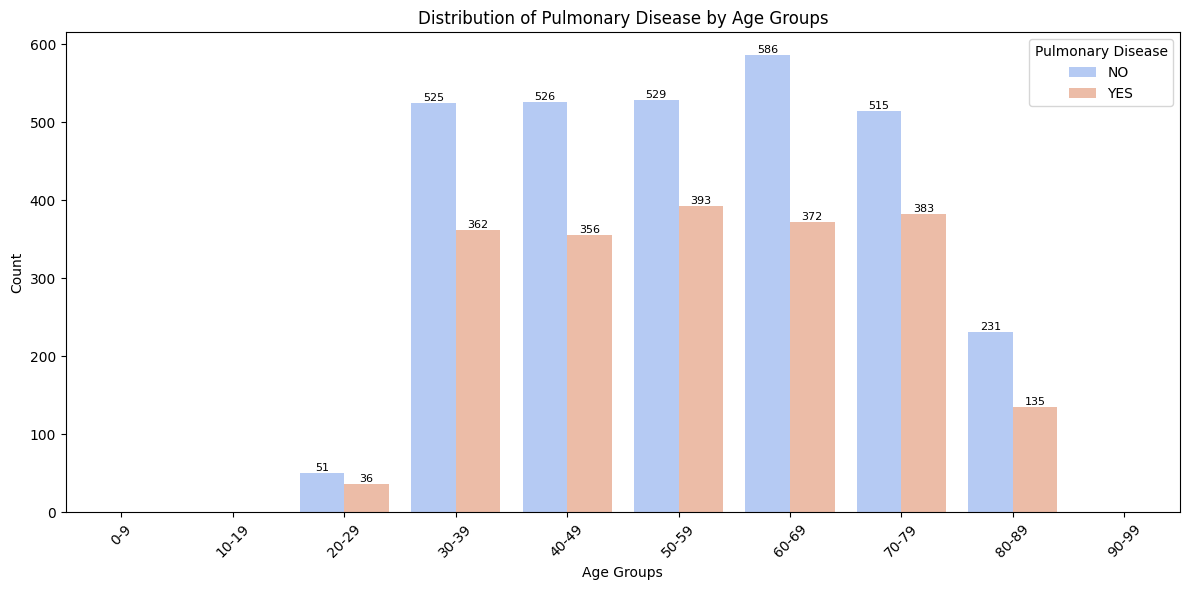


Age Group Distribution:
AGE_GROUP
0-9        0
10-19      0
20-29     87
30-39    887
40-49    882
50-59    922
60-69    958
70-79    898
80-89    366
90-99      0
Name: count, dtype: int64

Distribution of cases by age groups and pulmonary disease:
PULMONARY_DISEASE   NO  YES
AGE_GROUP                  
0-9                  0    0
10-19                0    0
20-29               51   36
30-39              525  362
40-49              526  356
50-59              529  393
60-69              586  372
70-79              515  383
80-89              231  135
90-99                0    0


In [171]:
# Define age brackets dynamically
age_brackets = list(range(0, 101, 10))  # 0-10, 11-20, ..., 91-100
age_labels = [f"{age_brackets[i]}-{age_brackets[i+1]-1}" for i in range(len(age_brackets)-1)]



# Create age groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_brackets, labels=age_labels, include_lowest=True)

# Define plot settings
plot_settings = {
    'figsize': (12, 6),
    'title': 'Distribution of Pulmonary Disease by Age Groups',
    'xlabel': 'Age Groups',
    'ylabel': 'Count',
    'xticks_rotation': 45,
    'legend_title': 'Pulmonary Disease'
}

# Create a visualization of age groups and pulmonary disease
plt.figure(figsize=plot_settings['figsize'])
ax = sns.countplot(data=df, x='AGE_GROUP', hue='PULMONARY_DISEASE', palette="coolwarm")

# Add count labels efficiently using bar_label
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=8)
ax.bar_label(ax.containers[1], fmt='%d', label_type='edge', fontsize=8)

plt.title(plot_settings['title'])
plt.xlabel(plot_settings['xlabel'])
plt.ylabel(plot_settings['ylabel'])
plt.xticks(rotation=plot_settings['xticks_rotation'])
plt.legend(title=plot_settings['legend_title'])
plt.tight_layout()
plt.show()

# Print the distribution with sorted order
print("\nAge Group Distribution:")
print(df['AGE_GROUP'].value_counts(sort=False))  # Keep order

print("\nDistribution of cases by age groups and pulmonary disease:")
print(df.groupby(['AGE_GROUP', 'PULMONARY_DISEASE'], observed=False).size().unstack())


In [172]:
df.head()


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE,AGE_GROUP
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO,60-69
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES,80-89
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO,50-59
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES,40-49
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES,70-79


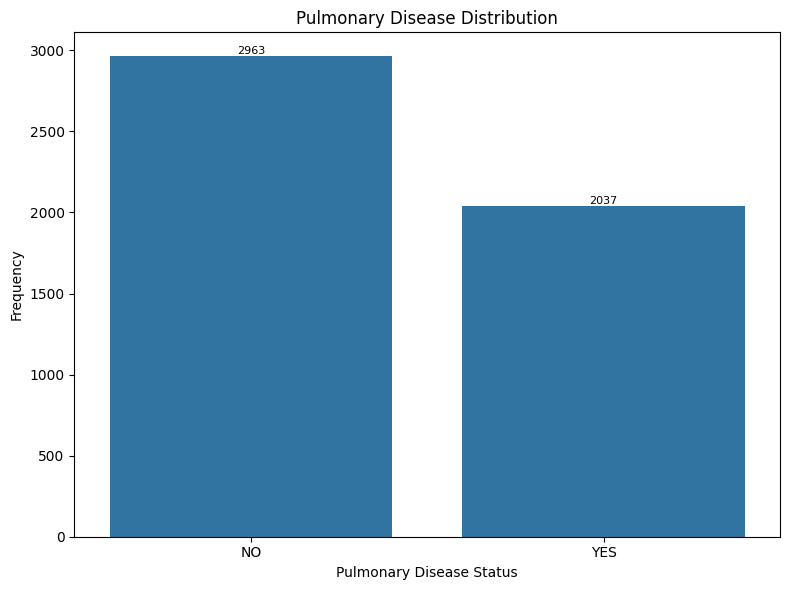

In [173]:
# Visualize the distribution of the Pulmonary disease variable
plt.figure(figsize=(8, 6))  # Set a larger figure size for better readability

# Use seaborn's countplot with a more descriptive title and labels
sns.countplot(x='PULMONARY_DISEASE', data=df, ax=plt.gca())
plt.title('Pulmonary Disease Distribution')
plt.xlabel('Pulmonary Disease Status')
plt.ylabel('Frequency')

# Add count labels efficiently using bar_label
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=8)

# Ensure labels fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()

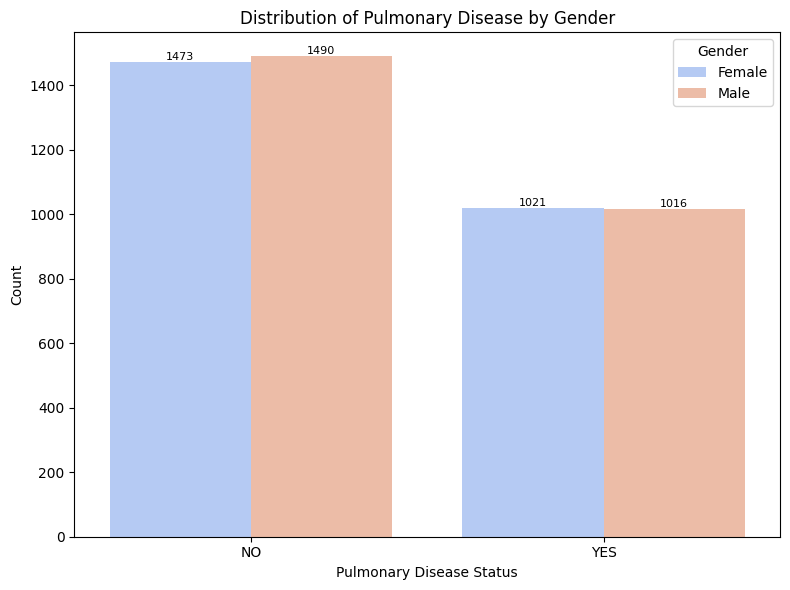

In [174]:
# Create a count plot for Pulmonary Disease by Gender
plt.figure(figsize=(8, 6))  # Set figure size
ax = sns.countplot(x='PULMONARY_DISEASE', hue='GENDER', data=df, palette="coolwarm")

# Add count labels efficiently using bar_label
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

# Customize the plot
plt.title('Distribution of Pulmonary Disease by Gender')
plt.xlabel('Pulmonary Disease Status')
plt.ylabel('Count')

# Manually set legend labels as 'Female' and 'Male'
plt.legend(title='Gender', labels=['Female', 'Male'])

# Improve label readability
plt.tight_layout()  
plt.show()


In [175]:
# Convert 'PULMONARY_DISEASE' column to integer (No → 0, Yes → 1)
if 'PULMONARY_DISEASE' in df.columns:
    df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'No': 0, 'Yes': 1, 'YES': 1, 'NO': 0}).fillna(0).astype(int)

# Create a numeric-only DataFrame (drop non-numeric columns)
df_numeric = df.select_dtypes(include=[np.number])

df_numeric.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


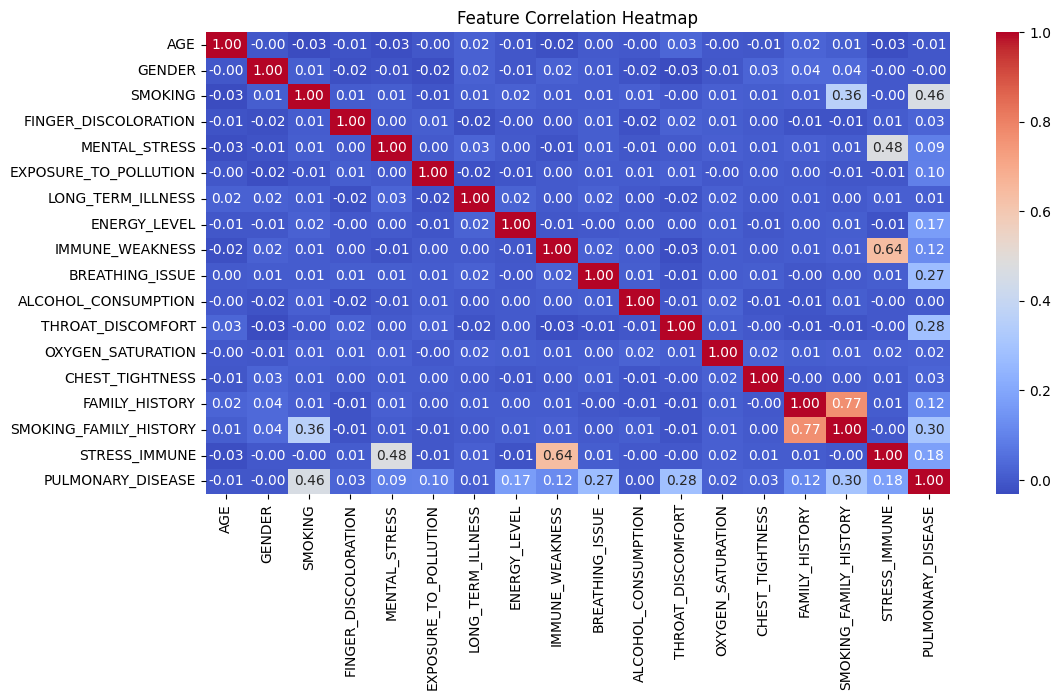

In [176]:
plt.figure(figsize=(12,6))



# Create heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [177]:
df_numeric.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


In [178]:
df.head()
df.dtypes
df.columns



Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE', 'AGE_GROUP'],
      dtype='object')

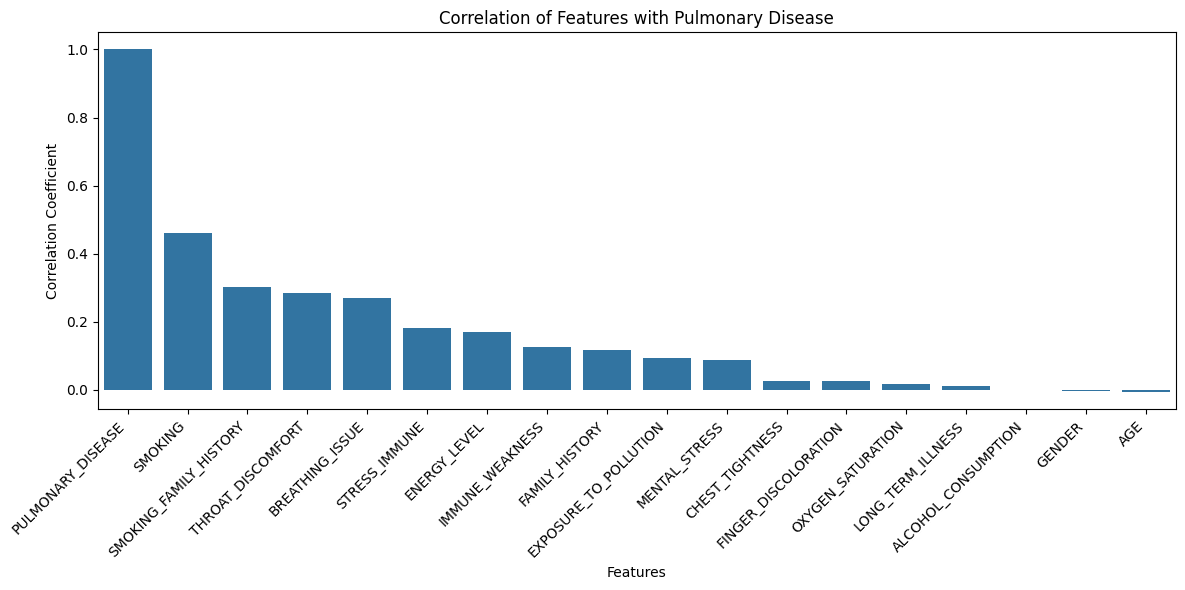


Correlation values with Pulmonary Disease:
PULMONARY_DISEASE         1.000000
SMOKING                   0.461467
SMOKING_FAMILY_HISTORY    0.302478
THROAT_DISCOMFORT         0.283545
BREATHING_ISSUE           0.270464
STRESS_IMMUNE             0.181053
ENERGY_LEVEL              0.171479
IMMUNE_WEAKNESS           0.124736
FAMILY_HISTORY            0.117255
EXPOSURE_TO_POLLUTION     0.095222
MENTAL_STRESS             0.089367
CHEST_TIGHTNESS           0.026244
FINGER_DISCOLORATION      0.026066
OXYGEN_SATURATION         0.018570
LONG_TERM_ILLNESS         0.012589
ALCOHOL_CONSUMPTION       0.000421
GENDER                   -0.004025
AGE                      -0.006489
Name: PULMONARY_DISEASE, dtype: float64


In [179]:
# Get correlations with PULMONARY_DISEASE and sort them

correlations = df_numeric.corr()['PULMONARY_DISEASE'].sort_values(ascending=False)

# Create a bar plot of correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Features with Pulmonary Disease')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Print the correlation values
print("\nCorrelation values with Pulmonary Disease:")
print(correlations)

C:\Users\oukan\AppData\Local\Temp\ipykernel_27556\3803647954.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, ax=axes[0], palette="coolwarm")


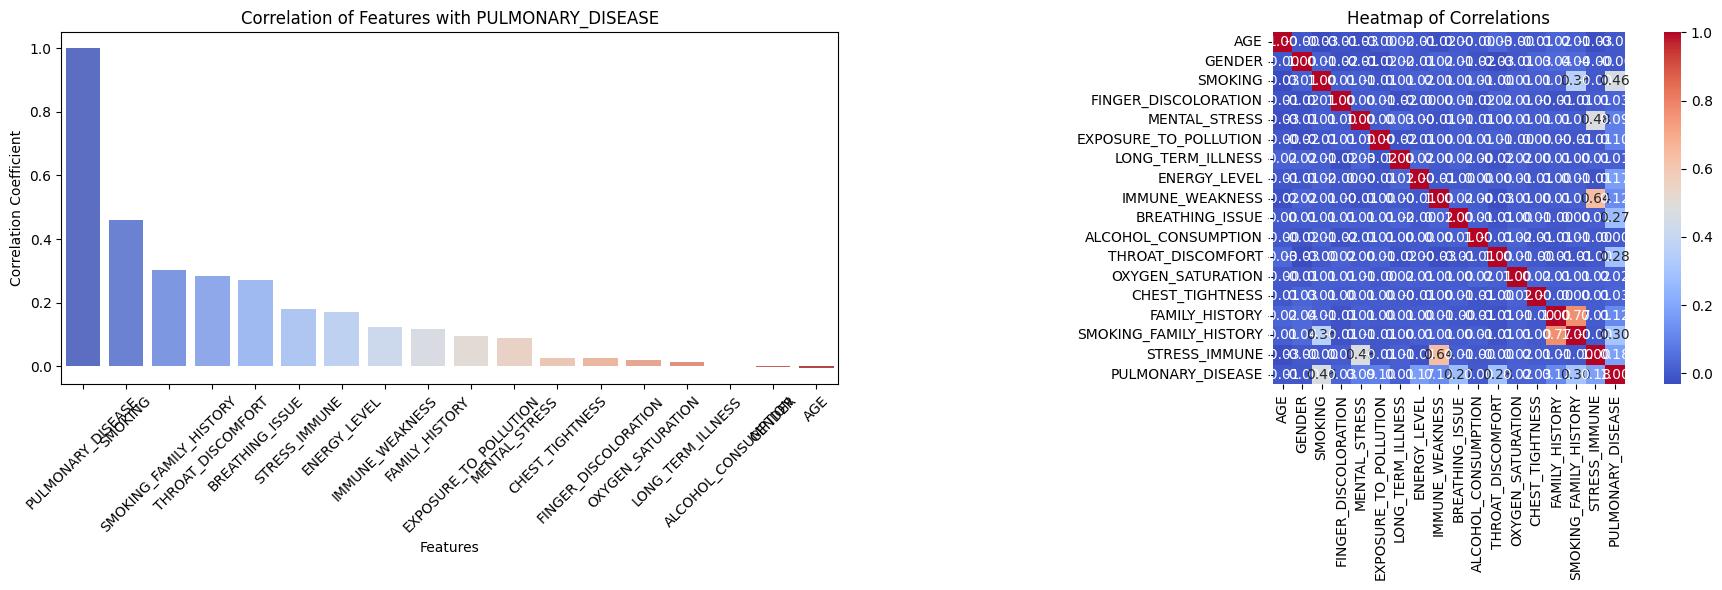


Correlation values with PULMONARY_DISEASE:
PULMONARY_DISEASE         1.000000
SMOKING                   0.461467
SMOKING_FAMILY_HISTORY    0.302478
THROAT_DISCOMFORT         0.283545
BREATHING_ISSUE           0.270464
STRESS_IMMUNE             0.181053
ENERGY_LEVEL              0.171479
IMMUNE_WEAKNESS           0.124736
FAMILY_HISTORY            0.117255
EXPOSURE_TO_POLLUTION     0.095222
MENTAL_STRESS             0.089367
CHEST_TIGHTNESS           0.026244
FINGER_DISCOLORATION      0.026066
OXYGEN_SATURATION         0.018570
LONG_TERM_ILLNESS         0.012589
ALCOHOL_CONSUMPTION       0.000421
GENDER                   -0.004025
AGE                      -0.006489
dtype: float64


In [180]:


def plot_correlations(df_numeric, target_column):
    """
    Plot the correlation of all features with a target column using subplots.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        target_column (str): The name of the target column.
    """
    # Compute correlations
    correlations = df_numeric.corrwith(df_numeric[target_column]).sort_values(ascending=False)
    corr_matrix = df_numeric.corr()

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Correlation bar plot
    sns.barplot(x=correlations.index, y=correlations.values, ax=axes[0], palette="coolwarm")
    axes[0].set_title(f'Correlation of Features with {target_column}')
    axes[0].set_xlabel('Features')
    axes[0].set_ylabel('Correlation Coefficient')
    axes[0].tick_params(axis='x', rotation=45)

    # Heatmap of correlations
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", ax=axes[1])
    axes[1].set_title('Heatmap of Correlations')

    # Improve layout
    plt.tight_layout()
    plt.show()

    # Print correlation values
    print(f"\nCorrelation values with {target_column}:")
    print(correlations)

# Usage
plot_correlations(df_numeric, 'PULMONARY_DISEASE')


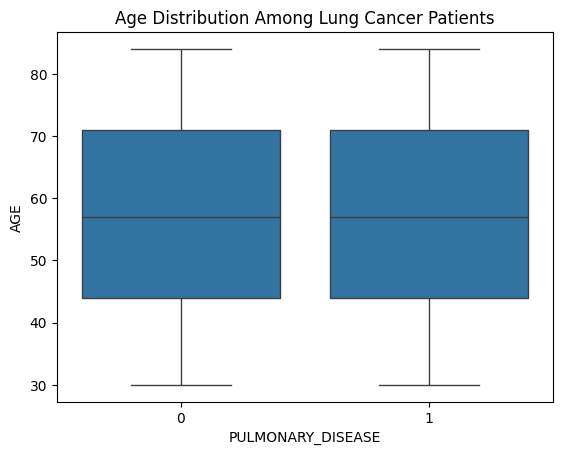

In [181]:
sns.boxplot(x='PULMONARY_DISEASE', y='AGE', data=df)
plt.title("Age Distribution Among Lung Cancer Patients")
plt.show()


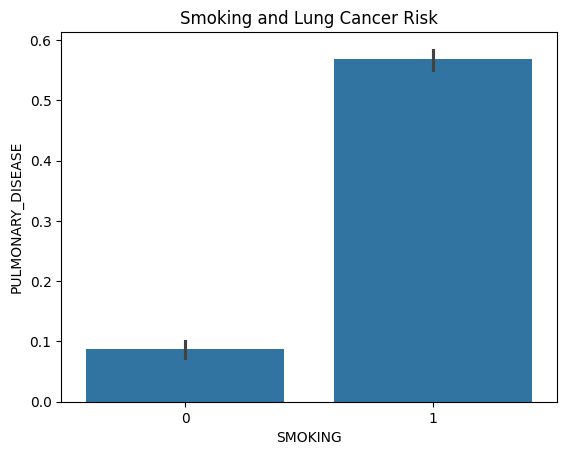

In [182]:
sns.barplot(x='SMOKING', y='PULMONARY_DISEASE', data=df)
plt.title("Smoking and Lung Cancer Risk")
plt.show()


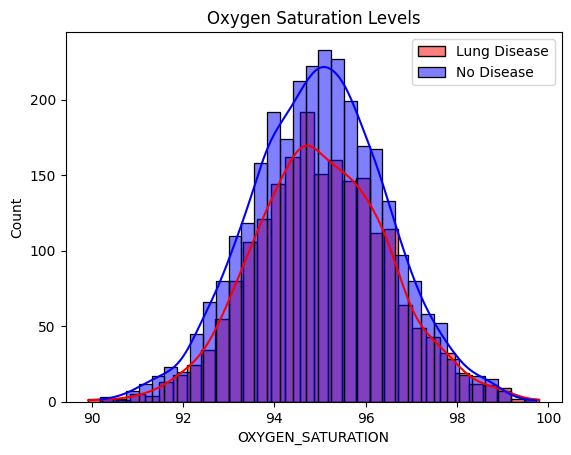

In [183]:
sns.histplot(df[df['PULMONARY_DISEASE'] == 1]['OXYGEN_SATURATION'], kde=True, color="red", label="Lung Disease")
sns.histplot(df[df['PULMONARY_DISEASE'] == 0]['OXYGEN_SATURATION'], kde=True, color="blue", label="No Disease")
plt.legend()
plt.title("Oxygen Saturation Levels")
plt.show()
